##Setup libraries, dataset path and movie genres

In [47]:
import pandas as pd
import os
dataset_path = "../dataset"
movie_genres = ['action', 'adventure', 'animation', 'biography', 'crime', 'family', 'fantasy', 
          'film-noir', 'history', 'horror', 'mystery', 'romance', 'scifi', 'sports', 
          'thriller', 'war']

##Read each file and store dataframes separately

In [48]:
# Define a dictionary to store dataframes for each genre
movies_by_genre = {}

# Update the dictionary
for file in os.listdir(dataset_path):
    for genre in movie_genres:
        if genre in file:
            if genre not in movies_by_genre:
                movies_by_genre[genre] = pd.read_csv(os.path.join(dataset_path, file))
            else:
                movies_by_genre[genre] = pd.concat([movies_by_genre[genre], pd.read_csv(os.path.join(dataset_path, file))])

# Print the number of rows and columns in each genre dataframe without any data quality checks
print("genre, number of rows, number of columns")
for genre, movies_df in movies_by_genre.items():
    print(genre, movies_df.shape)

genre, number of rows, number of columns
action (52452, 14)
adventure (25664, 14)
animation (8419, 14)
biography (8289, 14)
crime (35852, 14)
family (17095, 14)
fantasy (17163, 14)
film-noir (986, 14)
history (8996, 14)
horror (36682, 14)
mystery (18960, 14)
romance (52617, 14)
scifi (16557, 14)
sports (5292, 14)
thriller (53365, 14)
war (9911, 14)


### Perform data quality checks

In [49]:
# Dimensionality reduction
# for each dataframe in the dictionary, rename the columns and select only the columns we need
for genre, movies_df in movies_by_genre.items():
    movies_df.rename(columns={'gross(in $)': 'gross'}, inplace=True)
    movies_df.rename(columns={'movie_name': 'movie'}, inplace=True)
    movies_by_genre[genre] = movies_df[['movie', 'year', 'runtime', 'rating', 'director', 'star', 'votes', 'gross']]

# print the columns selected for each genre
for genre, movies_df in movies_by_genre.items():
    print(genre, movies_df.columns.values)

action ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
adventure ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
animation ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
biography ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
crime ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
family ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
fantasy ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
film-noir ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
history ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
horror ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
mystery ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
romance ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'votes' 'gross']
scifi ['movie' 'year' 'runtime' 'rating' 'director' 'star' 'v

##The study of trends over the years, specifically the popularity of genres
For this case study we will consider columns that can be used to visualize the trends in the movie industry over the years. We will consider the following columns: movie, year, runtime, rating, director, star. We will also consider the following columns for further analysis: gross

In [50]:
popularity_of_genres = {}
# remove null values 
for genre, movies_df in movies_by_genre.items():
    popularity_of_genres[genre] = movies_df[movies_df['year'].notnull()]

# number of rows containing null values for each genre
print("null values for each genre")
print("----------------------------------")
for genre, movies_df in movies_by_genre.items():
    print(genre, movies_df.shape[0] - popularity_of_genres[genre].shape[0])

null values for each genre
----------------------------------
action 8259
adventure 3689
animation 1369
biography 2005
crime 3563
family 1631
fantasy 2814
film-noir 0
history 1295
horror 7591
mystery 2004
romance 3437
scifi 4018
sports 575
thriller 10137
war 861


##Noise analysis

In [51]:
# try to normalize the year column values to a 4 digit year format
for genre, movies_df in popularity_of_genres.items():
    popularity_of_genres[genre]['year'] = popularity_of_genres[genre]['year'].astype(str).str[:4]

# remove values that are not in the years 1950-2023
for genre, movies_df in popularity_of_genres.items():
    popularity_of_genres[genre] = movies_df.loc[(movies_df['year'] >= '1950') & (movies_df['year'] <= '2023')]

# check if there are noises in the year column
for genre, movies_df in popularity_of_genres.items():
    print(genre, movies_df.loc[(movies_df['year'] < '1950') | (movies_df['year'] > '2023')].shape[0])


C:\Users\fisni\AppData\Local\Temp\ipykernel_95924\1924197460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_of_genres[genre]['year'] = popularity_of_genres[genre]['year'].astype(str).str[:4]
C:\Users\fisni\AppData\Local\Temp\ipykernel_95924\1924197460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popularity_of_genres[genre]['year'] = popularity_of_genres[genre]['year'].astype(str).str[:4]
C:\Users\fisni\AppData\Local\Temp\ipykernel_95924\1924197460.py:3: SettingWithCopyWarning: 
A valu

action 0
adventure 0
animation 0
biography 0
crime 0
family 0
fantasy 0
film-noir 0
history 0
horror 0
mystery 0
romance 0
scifi 0
sports 0
thriller 0
war 0


##Feature Generation

In [52]:
# create a new column genre
for genre, movies_df in popularity_of_genres.items():
    popularity_of_genres[genre]['genre'] = genre

# combine all the dataframes into one
all_movie_genres = pd.concat(popularity_of_genres.values())

# list the amount of movies for each year based on genre
print(all_movie_genres.groupby(['year', 'genre']).size())

year  genre    
1950  action       100
      adventure    114
      animation      8
      biography     20
      crime        215
                  ... 
2023  romance      399
      scifi        233
      sports        45
      thriller     659
      war           47
Length: 1119, dtype: int64


In [53]:
# show top 1 movie genre for each year
print(all_movie_genres.groupby(['year', 'genre']).size().groupby(level=0, group_keys=False).nlargest(1))

year  genre   
1950  romance      221
1951  romance      272
1952  romance      253
1953  romance      265
1954  romance      289
                  ... 
2019  thriller    1711
2020  thriller    1431
2021  thriller    1737
2022  thriller    2129
2023  thriller     659
Length: 74, dtype: int64


In [54]:
# Find the most frequent genre
result = all_movie_genres.groupby(['year', 'genre']).size().groupby(level=0, group_keys=False).nlargest(1)

most_frequent_genre = result.idxmax()[1]

print("The genre with the most top 1 placings throughout the years is:", most_frequent_genre)

The genre with the most top 1 placings throughout the years is: thriller


### Outlier Detection

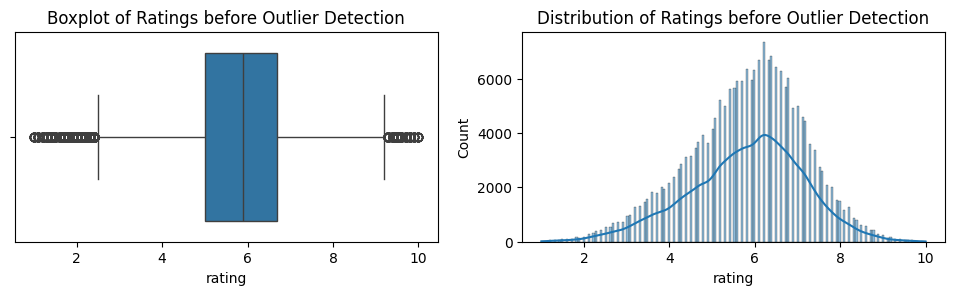

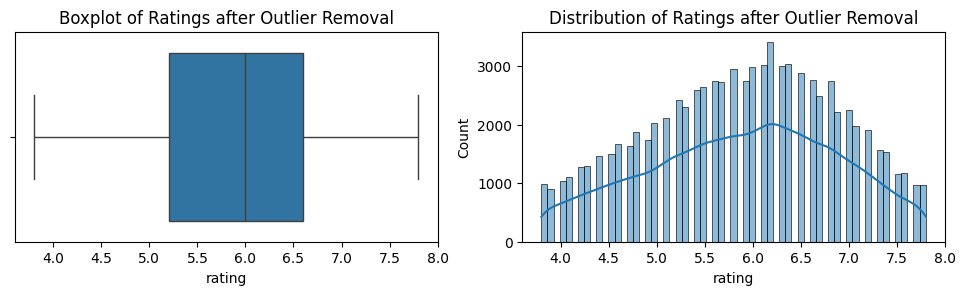

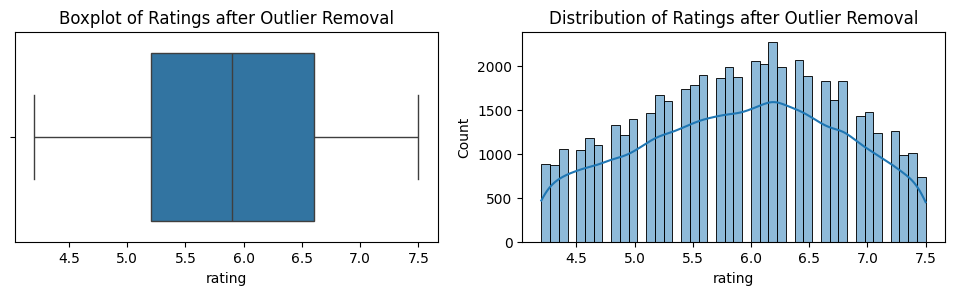

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# remove null values
all_movie_genres = all_movie_genres[all_movie_genres['rating'].notnull()]

# Visualize the distribution of 'rating' before outlier detection
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=all_movie_genres['rating'])
plt.title('Boxplot of Ratings before Outlier Detection')

plt.subplot(2, 2, 2)
sns.histplot(all_movie_genres['rating'], kde=True)
plt.title('Distribution of Ratings before Outlier Detection')

def detect_outliers_zscore(df, column_name, threshold=1.5):
    z_scores = np.abs((df[column_name] - df[column_name].mean()) / df[column_name].std())
    outliers = df[(z_scores > threshold)]
    return outliers

def detect_outliers_iqr(df, column_name, threshold=0.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column_name] < Q1 - threshold * IQR) | (df[column_name] > Q3 + threshold * IQR)]
    return outliers


# Detect outliers using z-score
outliers_zscore = detect_outliers_zscore(all_movie_genres, 'rating')
filtered_df_zscore = all_movie_genres[~all_movie_genres.index.isin(outliers_zscore.index)]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
sns.boxplot(x=filtered_df_zscore['rating'])
plt.title('Boxplot of Ratings after Outlier Removal')

plt.subplot(2, 2, 4)
sns.histplot(filtered_df_zscore['rating'], kde=True)
plt.title('Distribution of Ratings after Outlier Removal')

plt.show()

# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(all_movie_genres, 'rating')
filtered_df_iqr = all_movie_genres[~all_movie_genres.index.isin(outliers_iqr.index)]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x=filtered_df_iqr['rating'])
plt.title('Boxplot of Ratings after Outlier Removal')

plt.subplot(2, 2, 2)
sns.histplot(filtered_df_iqr['rating'], kde=True)
plt.title('Distribution of Ratings after Outlier Removal')

plt.show()

ASdsadasdasd

In [56]:
# number of movies before outlier detection
print("Number of movies before outlier detection:", all_movie_genres.shape[0])

# number of movies after outlier detection using z-score
print("Number of movie outliers using z-score:", filtered_df_zscore.shape[0])

# number of movies after outlier detection using IQR
print("Number of movie outliers using IQR:", filtered_df_iqr.shape[0])

Number of movies before outlier detection: 210296
Number of movie outliers using z-score: 83711
Number of movie outliers using IQR: 51588


In [70]:
# make genre a categorical variable (assign a number to each genre)
# genre name and value
print("genre name and value")
print(filtered_df_zscore['genre'].value_counts())

# Create a mapping dictionary
genre_mapping = {
    'action': 1,
    'adventure': 2,
    'animation': 3,
    'biography': 4,
    'crime': 5,
    'family': 6,
    'fantasy': 7,
    'film-noir': 8,
    'history': 9,
    'horror': 10,
    'mystery': 11,
    'romance': 12,
    'scifi': 13,
    'sports': 14,
    'thriller': 15,
    'war': 16
}

# Map the values using the replace method
filtered_df_zscore['genre_mapped'] = filtered_df_zscore['genre'].replace(genre_mapping)

# Print the top 5 rows of the new column
print(filtered_df_zscore[['genre', 'genre_mapped']].head())


genre name and value
genre
12    16277
15    15158
1     13016
5      8778
10     7777
2      4762
11     3281
6      3233
7      2839
13     2362
16     1556
9      1317
3      1297
4      1125
14      774
8       159
Name: count, dtype: int64
     genre  genre_mapped
61       1             1
72       1             1
82       1             1
89       1             1
124      1             1


C:\Users\fisni\AppData\Local\Temp\ipykernel_95924\4173241779.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_zscore['genre_mapped'] = filtered_df_zscore['genre'].replace(genre_mapping)


### Data Exploration

Print the first 20 rows of the dataset:
                                movie  year  runtime  rating  \
0      Black Panther: Wakanda Forever  2022  161 min     6.9   
1            Avatar: The Way of Water  2022  192 min     7.8   
2                               Plane  2023  107 min     6.5   
3   Everything Everywhere All at Once  2022  139 min     8.0   
5   Ant-Man and the Wasp: Quantumania  2023  125 min     6.6   
6                     Shotgun Wedding  2022  100 min     5.4   
7                        Bullet Train  2022  127 min     7.3   
8      All Quiet on the Western Front  2022  148 min     7.8   
9                   Top Gun: Maverick  2022  130 min     8.3   
10                            Pathaan  2023  146 min     6.6   
11               Teen Wolf: The Movie  2023  140 min     5.6   
12                      Black Panther  2018  134 min     7.3   
13                         The Batman  2022  176 min     7.8   
14                            Top Gun  1986  109 min     6.9   


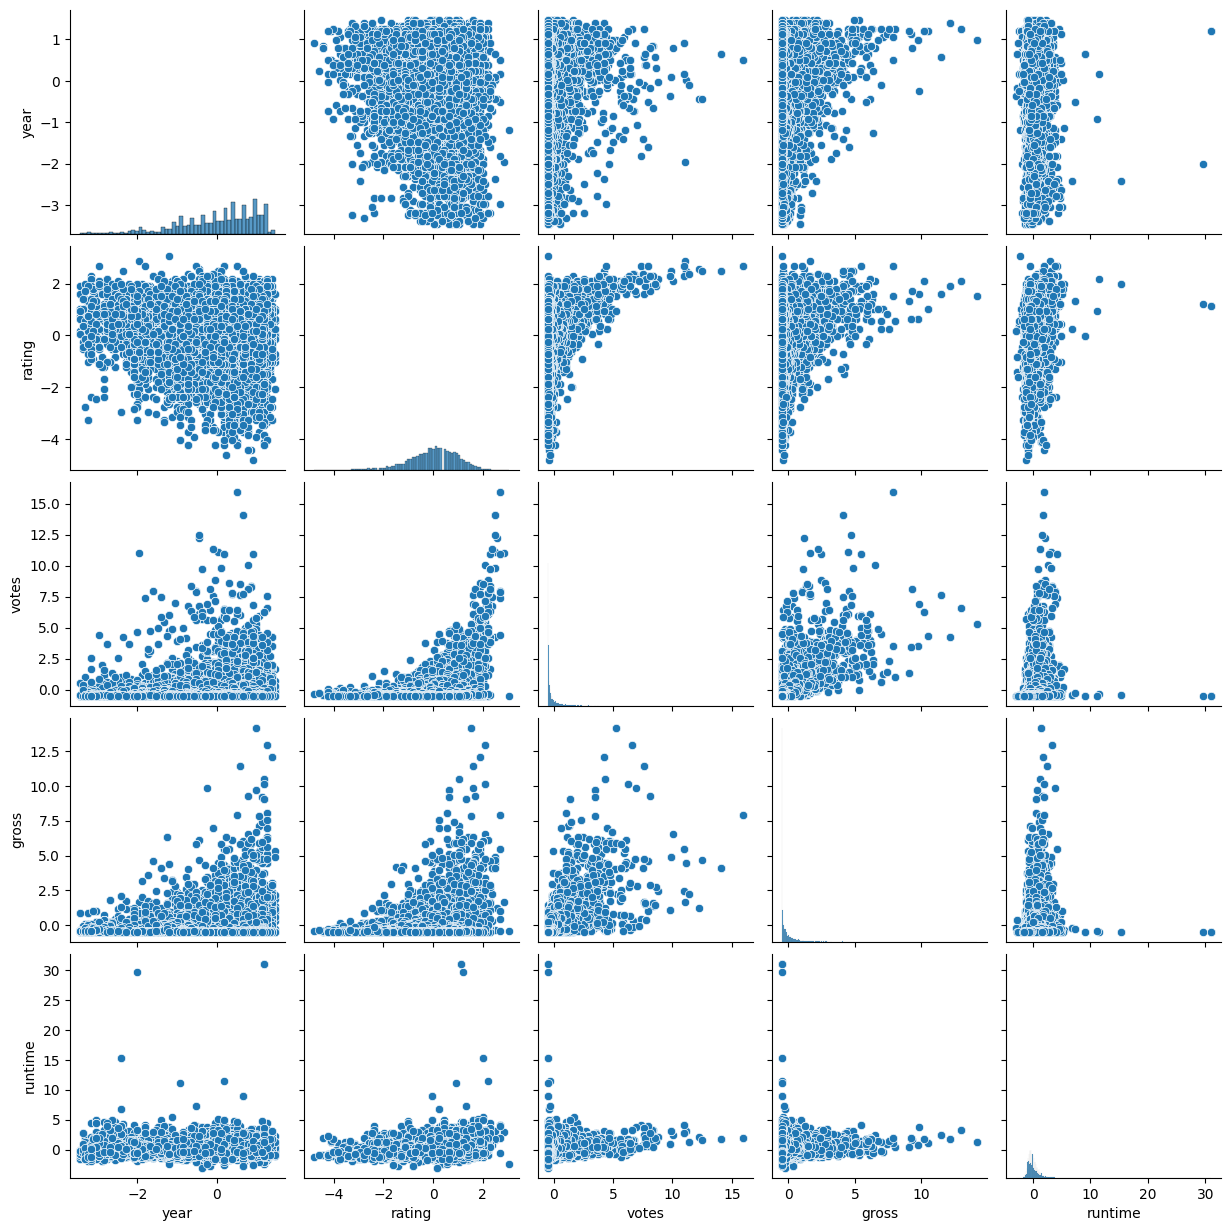

Linear Regression R-squared score on the test set: 1.0


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# Display the first 20 rows
print("Print the first 20 rows of the dataset:")
print(all_movie_genres.head(20))
print('\n')

# Display general information about the dataset
print("Dataset information:")
print(all_movie_genres.info())
print('\n')

# Handling Missing Data (if any)
# For simplicity, let's drop rows with missing values for this example
all_movie_genres.dropna(inplace=True)

# Data Cleaning (if needed)
# This step may involve correcting errors, removing duplicates, etc.
# convert runtime to numeric (e.x. 140 min to 140)
all_movie_genres['runtime'] = all_movie_genres['runtime'].str.split().str[0]
all_movie_genres['runtime'] = pd.to_numeric(all_movie_genres['runtime'])

# Standardization of Numeric Features
numeric_features = ['year', 'rating', 'votes', 'gross', 'runtime']
scaler = StandardScaler()
all_movie_genres[numeric_features] = scaler.fit_transform(all_movie_genres[numeric_features])

# Outlier Detection (assuming you've already done this for 'rating')
# You can adapt the outlier detection code for other numeric features if needed

# Explore and visualize relationships between variables (multivariate analysis)
# For simplicity, let's create a pair plot using Seaborn
sns.pairplot(all_movie_genres[numeric_features])
plt.show()

# Create feature X and target y
X = all_movie_genres.drop(['movie', 'director', 'star', 'gross', 'genre'], axis=1)
y = all_movie_genres['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101, shuffle=True)

# Standardize features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Linear Regression
model = LinearRegression()
model.fit(scaled_X_train, y_train)

# Evaluate the model on the test set
score = model.score(scaled_X_test, y_test)
print("Linear Regression R-squared score on the test set:", score)



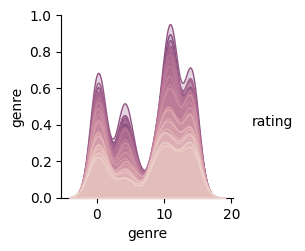

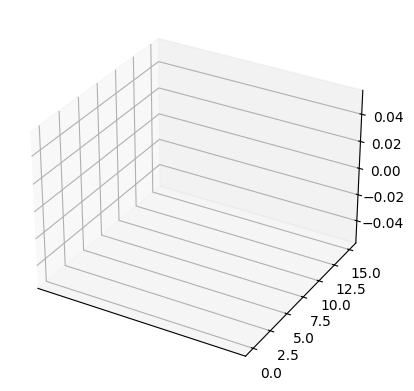

IndexError: single positional indexer is out-of-bounds

In [63]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def SMOTE(X, Y, minority_class, k=5):
    """
    :param X: np.array, features
    :param Y: np.array, target
    :param minority_class: int, the minority class label
    :param k: int, number of nearest neighbors
    :return: np.array, np.array, synthetic samples and their corresponding labels
    """
    # Find the minority class indices
    minority_indices = np.where(Y == minority_class)[0]

    # Find the nearest neighbors of the minority class points
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(X[minority_indices])
    _, indices = nn.kneighbors(X[minority_indices])

    # Generate synthetic data points
    synthetic_data = []
    for i in range(len(minority_indices)):
        for j in indices[i]:
            synthetic_data.append(X[minority_indices[i]] + np.random.random(X.shape[1]) * (X[minority_indices[j]] - X[minority_indices[i]]))

    # Concatenate the synthetic data with the original data and labels
    synthetic_X = np.concatenate((X, np.array(synthetic_data)), axis=0)
    synthetic_Y = np.concatenate((Y, np.full(len(synthetic_data), minority_class)), axis=0)

    return synthetic_X, synthetic_Y

def pairplot(dataFrame):
    # Create a pairplot with the target column as the hue
    sns.pairplot(dataFrame, hue='rating')

    # Show the plot
    plt.show()

def plot3d(dataFrame):
    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dataFrame['year'], dataFrame['genre'], c=dataFrame['rating'])

    # Show the plot
    plt.show()

# Replace these attributes based on your actual dataset
columns = ["year", "rating", "genre"]


InitDataFrame = pd.DataFrame(data=filtered_df_iqr, columns=columns)
InitDataFrame

pairplot(InitDataFrame)
plot3d(InitDataFrame)

x = InitDataFrame.iloc[:, :3].values
y = InitDataFrame.iloc[:, 3].values

# Assume 'rating' is the minority class in this example
X, Y = SMOTE(x, y, minority_class=3, k=3)

FinalDataFrame = pd.DataFrame(data=X, columns=columns[:3])
FinalDataFrame['rating'] = Y

pairplot(FinalDataFrame)
plot3d(FinalDataFrame)
